In [1]:
from google.colab import drive
import json
import pandas as pd

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pwd


'/content'

In [6]:
json_path='/content/drive/MyDrive/review-Washington_10.json'

Printing first three JSON lines

In [7]:
with open(json_path,'r',encoding='utf-8') as f:
  for _ in range(3):
    print(f.readline().rstrip())


{"user_id": "103093043835388050629", "name": "Casper Steele", "time": 1626907411534, "rating": 2, "text": "Drivers say security has bathroom key. Security says they aren't 'allowed' to unlock the bathroom. How do you expect people to behave according to health and safety regulations when you can't provide the basic public business necessities.", "pics": null, "resp": null, "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc"}
{"user_id": "111014066796803341223", "name": "Judy Maes", "time": 1613028426989, "rating": 5, "text": "It's a CTRAN transit center with schedules to look at and sanitation cleaning of buses before reboarding.", "pics": null, "resp": null, "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc"}
{"user_id": "111724423355988809570", "name": "Daniel Hernandez", "time": 1536710665852, "rating": 5, "text": "Neat little Transit Center with lots of schedules for C-Tran and Express lines. You will almost never have to wait more than 30 minutes for a bus that will take you to you

Printing last three JSON lines

In [8]:
from collections import deque

with open(json_path,'r',encoding='utf-8') as f:
  last_3=deque(f,maxlen=3)
for line in last_3:
  print(line.rstrip())

{"user_id": "106769570059000033926", "name": "Imran Aslam", "time": 1529132134824, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x54906c4bb4541b15:0x167db6becb362e15"}
{"user_id": "101099994640606261545", "name": "ahmed alsalihi", "time": 1563403471882, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x54906c4bb4541b15:0x167db6becb362e15"}
{"user_id": "105185672996234882794", "name": "mohammed koya", "time": 1519875458049, "rating": 5, "text": null, "pics": null, "resp": null, "gmap_id": "0x54906c4bb4541b15:0x167db6becb362e15"}


All text is null in last 3

In [6]:
line_count=0
with open(json_path,'r',encoding='utf-8') as f:
  for _ in f:
   line_count+=1
print("No on JSON lines: ",line_count)


No on JSON lines:  10192020


Aligns with what is mentioned in dataset - Washington	10-core (10,192,020 reviews)

In [18]:
meta_path='/content/drive/MyDrive/meta-Washington.json'

In [10]:
with open(meta_path,'r',encoding='utf-8') as m:
  for _ in range(3):
    print(m.readline().rstrip())

{"name": "Vancouver (99th St Station)", "address": "Vancouver (99th St Station), Vancouver, WA 98665", "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc", "description": null, "latitude": 45.6906933, "longitude": -122.66373349999999, "category": ["Bus station"], "avg_rating": 3.6, "num_of_reviews": 28, "price": null, "hours": null, "MISC": {"Accessibility": ["Passenger loading area", "Wheelchair accessible entrance"]}, "state": null, "relative_results": ["0x5495a4bd41784269:0xb04d0997ebbbf7c1", "0x5495ae8127051955:0x856ca9220a584d1a", "0x5495ae8b0e21f267:0xe7db6bb4f87a789c", "0x5495aeed4155630f:0x9c8310b516103bc4", "0x5495ae62139ee88d:0x1d4a20239e0a783b"], "url": "https://www.google.com/maps/place//data=!4m2!3m1!1s0x5495ae7d3bf7d097:0xbcbc06152a3ccebc?authuser=-1&hl=en&gl=us"}
{"name": "Green Mountain Mobile Ranch", "address": "Green Mountain Mobile Ranch, 21209 NE 58th St, Vancouver, WA 98682", "gmap_id": "0x5495ba6a9677196b:0xa46cbab362492a85", "description": null, "latitude": 45.663

In [9]:
with open(meta_path,'r',encoding='utf-8') as m:
  for _ in range(41423,41427):
    print(m.readline().rstrip())

{"name": "Vancouver (99th St Station)", "address": "Vancouver (99th St Station), Vancouver, WA 98665", "gmap_id": "0x5495ae7d3bf7d097:0xbcbc06152a3ccebc", "description": null, "latitude": 45.6906933, "longitude": -122.66373349999999, "category": ["Bus station"], "avg_rating": 3.6, "num_of_reviews": 28, "price": null, "hours": null, "MISC": {"Accessibility": ["Passenger loading area", "Wheelchair accessible entrance"]}, "state": null, "relative_results": ["0x5495a4bd41784269:0xb04d0997ebbbf7c1", "0x5495ae8127051955:0x856ca9220a584d1a", "0x5495ae8b0e21f267:0xe7db6bb4f87a789c", "0x5495aeed4155630f:0x9c8310b516103bc4", "0x5495ae62139ee88d:0x1d4a20239e0a783b"], "url": "https://www.google.com/maps/place//data=!4m2!3m1!1s0x5495ae7d3bf7d097:0xbcbc06152a3ccebc?authuser=-1&hl=en&gl=us"}
{"name": "Green Mountain Mobile Ranch", "address": "Green Mountain Mobile Ranch, 21209 NE 58th St, Vancouver, WA 98682", "gmap_id": "0x5495ba6a9677196b:0xa46cbab362492a85", "description": null, "latitude": 45.663

Convert to dataframes to do better EDA. DO NOT USE Json.loads as it loads the entire file into Python list of dicts before pandas can use it and gives rise to lot of overhead and RAM crash

In [11]:
!pip -q install duckdb pyarrow
import duckdb

In [12]:
import os

In [12]:
duckdb.sql(f"""
  SELECT DISTINCT cat AS category
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
  CROSS JOIN UNNEST(COALESCE(category, [])) AS u(cat)
  ORDER BY 1
""").df()




FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category
0,3D printing service
1,ATM
2,ATV dealer
3,ATV rental service
4,ATV repair shop
...,...
3409,Youth club
3410,Youth group
3411,Youth organization
3412,Youth social services organization


In [20]:
import duckdb
import pandas as pd


con = duckdb.connect()

# ---------------------------
# 1) REVIEWS: requested stats
# ---------------------------
reviews_sql = f"""
WITH t AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
)
SELECT
  COUNT(*)                                                   AS total_rows,

  /* user_id presence */
  SUM(CASE WHEN user_id IS NOT NULL THEN 1 ELSE 0 END)      AS user_id_count,
  SUM(CASE WHEN user_id IS NULL     THEN 1 ELSE 0 END)      AS user_id_missing,

  /* gmap_id presence */
  SUM(CASE WHEN gmap_id IS NOT NULL THEN 1 ELSE 0 END)      AS gmap_id_count,
  SUM(CASE WHEN gmap_id IS NULL     THEN 1 ELSE 0 END)      AS gmap_id_missing,

  /* rating stats (over non-null) */
  SUM(CASE WHEN rating IS NOT NULL THEN 1 ELSE 0 END)       AS rating_count,
  SUM(CASE WHEN rating IS NULL     THEN 1 ELSE 0 END)       AS rating_missing,
  MIN(rating)                                               AS rating_min,
  MAX(rating)                                               AS rating_max,
  AVG(rating)                                               AS rating_mean,
  STDDEV_SAMP(rating)                                       AS rating_stddev,

  /* time presence */
  SUM(CASE WHEN time IS NOT NULL THEN 1 ELSE 0 END)         AS time_count,
  SUM(CASE WHEN time IS NULL     THEN 1 ELSE 0 END)         AS time_missing,

  /* text length stats (over non-null text) */
  AVG(LENGTH(text)) FILTER (WHERE text IS NOT NULL)         AS text_len_mean,
  MIN(LENGTH(text)) FILTER (WHERE text IS NOT NULL)         AS text_len_min,
  MAX(LENGTH(text)) FILTER (WHERE text IS NOT NULL)         AS text_len_max,
  SUM(CASE WHEN text IS NULL THEN 1 ELSE 0 END)             AS text_missing

FROM t;
"""
reviews_stats = con.sql(reviews_sql).df()

# ------------------------------------
# 2) META (places): requested summaries
# ------------------------------------
meta_presence_sql = f"""
WITH m AS (
  SELECT *
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
)
SELECT
  COUNT(*)                                                         AS total_rows,

  /* latitude / longitude presence */
  SUM(CASE WHEN latitude  IS NOT NULL THEN 1 ELSE 0 END)          AS latitude_count,
  SUM(CASE WHEN latitude  IS NULL     THEN 1 ELSE 0 END)          AS latitude_missing,
  SUM(CASE WHEN longitude IS NOT NULL THEN 1 ELSE 0 END)          AS longitude_count,
  SUM(CASE WHEN longitude IS NULL     THEN 1 ELSE 0 END)          AS longitude_missing,

  /* category presence (treat missing if NULL or empty list) */
  SUM(CASE
        WHEN category IS NOT NULL AND len(category) > 0
        THEN 1 ELSE 0
      END)                                                         AS category_count,
  SUM(CASE
        WHEN category IS NULL OR len(category) = 0
        THEN 1 ELSE 0
      END)                                                         AS category_missing,

  /* price stats: try cast to numeric; only numeric rows are used */
  SUM(CASE WHEN TRY_CAST(price AS DOUBLE) IS NOT NULL THEN 1 ELSE 0 END) AS price_count_num,
  SUM(CASE WHEN TRY_CAST(price AS DOUBLE) IS NULL     THEN 1 ELSE 0 END) AS price_missing_or_non_num,
  MIN(TRY_CAST(price AS DOUBLE))                                   AS price_min,
  MAX(TRY_CAST(price AS DOUBLE))                                   AS price_max,
  AVG(TRY_CAST(price AS DOUBLE))                                   AS price_mean,
  STDDEV_SAMP(TRY_CAST(price AS DOUBLE))                           AS price_stddev,

  /* avg_rating stats (numeric) */
  SUM(CASE WHEN avg_rating IS NOT NULL THEN 1 ELSE 0 END)         AS avg_rating_count,
  SUM(CASE WHEN avg_rating IS NULL     THEN 1 ELSE 0 END)         AS avg_rating_missing,
  MIN(avg_rating)                                                 AS avg_rating_min,
  MAX(avg_rating)                                                 AS avg_rating_max,
  AVG(avg_rating)                                                 AS avg_rating_mean,
  STDDEV_SAMP(avg_rating)                                         AS avg_rating_stddev,

  /* hours: count present/missing, min/max number of entries if it's a LIST */
  SUM(CASE WHEN hours IS NOT NULL THEN 1 ELSE 0 END)              AS hours_count,
  SUM(CASE WHEN hours IS NULL     THEN 1 ELSE 0 END)              AS hours_missing
FROM m;
"""
meta_presence = con.sql(meta_presence_sql).df()

# Hours min/max length (split out to avoid type issues).
# If your data guarantees hours is a LIST when non-null, this works.
meta_hours_len_sql = f"""
WITH m AS (
  SELECT *
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
),
lens AS (
  SELECT
    CASE WHEN hours IS NULL THEN NULL ELSE len(hours) END AS hours_len
  FROM m
)
SELECT
  MIN(hours_len) AS hours_min_len,
  MAX(hours_len) AS hours_max_len
FROM lens
WHERE hours_len IS NOT NULL;
"""
try:
    meta_hours_len = con.sql(meta_hours_len_sql).df()
except Exception as e:
    meta_hours_len = pd.DataFrame([{"hours_min_len": None, "hours_max_len": None}])

# description text lengths
meta_desc_sql = f"""
WITH m AS (
  SELECT *
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
)
SELECT
  AVG(LENGTH(description)) FILTER (WHERE description IS NOT NULL) AS desc_len_mean,
  MIN(LENGTH(description)) FILTER (WHERE description IS NOT NULL) AS desc_len_min,
  MAX(LENGTH(description)) FILTER (WHERE description IS NOT NULL) AS desc_len_max,
  SUM(CASE WHEN description IS NULL THEN 1 ELSE 0 END)            AS description_missing
FROM m;
"""
meta_description_stats = con.sql(meta_desc_sql).df()

# ---------------------------------------------
# 3) Category matches: restaurant / bar / cafe
#    (distinct gmap_id with any matching term)
# ---------------------------------------------
cat_counts_sql = f"""
WITH m AS (
  SELECT *
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
),
u AS (
  SELECT gmap_id, UNNEST(COALESCE(category, [])) AS cat
  FROM m
)
SELECT
  COUNT(DISTINCT CASE WHEN LOWER(cat) LIKE '%restaurant%' THEN gmap_id END) AS places_with_restaurant,
  COUNT(DISTINCT CASE WHEN LOWER(cat) LIKE '%bar%'        THEN gmap_id END) AS places_with_bar,
  COUNT(DISTINCT CASE WHEN LOWER(cat) LIKE '%cafe%'       THEN gmap_id END) AS places_with_cafe
FROM u;
"""
category_keyword_counts = con.sql(cat_counts_sql).df()

# -------------------------
# Display / use the results
# -------------------------
print("\n--- Reviews: descriptive stats ---")
print(reviews_stats)

print("\n--- Meta: presence & numeric stats ---")
print(meta_presence)

print("\n--- Meta: hours length (min/max entries) ---")
print(meta_hours_len)

print("\n--- Meta: description length stats ---")
print(meta_description_stats)

print("\n--- Meta: category keyword counts (distinct places) ---")
print(category_keyword_counts)


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))


--- Reviews: descriptive stats ---
   total_rows  user_id_count  user_id_missing  gmap_id_count  gmap_id_missing  \
0    10192020     10192020.0              0.0     10192020.0              0.0   

   rating_count  rating_missing  rating_min  rating_max  rating_mean  \
0    10192020.0             0.0           1           5     4.297551   

   rating_stddev  time_count  time_missing  text_len_mean  text_len_min  \
0       1.048825  10192020.0           0.0     122.251082             1   

   text_len_max  text_missing  
0         16787     4564789.0  

--- Meta: presence & numeric stats ---
   total_rows  latitude_count  latitude_missing  longitude_count  \
0      121304        121304.0               0.0         121304.0   

   longitude_missing  category_count  category_missing  price_count_num  \
0                0.0        120749.0             555.0              0.0   

   price_missing_or_non_num  price_min  ...  price_mean  price_stddev  \
0                  121304.0        NaN  

In [22]:
q = f"""
WITH m AS (
  SELECT
    -- coerce num_of_reviews like "1,234 reviews" -> 1234
    TRY_CAST(REGEXP_REPLACE(num_of_reviews::VARCHAR, '[^0-9]', '') AS BIGINT) AS num_reviews_num,
    -- coerce avg_rating to DOUBLE
    TRY_CAST(price AS DOUBLE) AS price_num
  FROM read_json_auto('{meta_path}', records=true)
)
SELECT
  COUNT(*)                                                AS rows,

  -- num_of_reviews stats
  COUNT(num_reviews_num)                                  AS num_reviews_nonnull,
  SUM(CASE WHEN num_reviews_num IS NULL THEN 1 ELSE 0 END) AS num_reviews_missing,
  MIN(num_reviews_num)                                    AS num_reviews_min,
  MAX(num_reviews_num)                                    AS num_reviews_max,
  AVG(num_reviews_num)                                    AS num_reviews_mean,
  STDDEV_SAMP(num_reviews_num)                            AS num_reviews_std,

  -- price stats
  COUNT(price_num)                                   AS price_num_nonnull,
  SUM(CASE WHEN price_num IS NULL THEN 1 ELSE 0 END) AS price_num_missing,
  MIN(price_num)                                     AS price_num_min,
  MAX(price_num)                                     AS price_num_max,
  AVG(price_num)                                     AS price_num_mean,
  STDDEV_SAMP(price_num)                             AS price_num_std
FROM m;
"""
con.sql(q).df()


,rows,num_reviews_nonnull,num_reviews_missing,num_reviews_min,num_reviews_max,num_reviews_mean,num_reviews_std,price_num_nonnull,price_num_missing,price_num_min,price_num_max,price_num_mean,price_num_std
0,121304,121304,0.0,1,9998,136.36594,360.989098,0,121304.0,NaN,NaN,NaN,NaN


In [26]:
con.sql(f"""
SELECT
  COUNT(*) AS rows,
  COUNT(text) AS text_nonnull,  -- non-NULL (blank strings counted as non-null)
  SUM(CASE WHEN text IS NULL THEN 1 ELSE 0 END) AS text_missing,  -- NULLs only
  SUM(CASE WHEN text IS NOT NULL AND LENGTH(TRIM(text)) = 0 THEN 1 ELSE 0 END) AS text_blank  -- empty/whitespace
FROM read_json_auto('{json_path}', records=true);
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,rows,text_nonnull,text_missing,text_blank
0,10192020,5627231,4564789.0,0.0


In [27]:
con.sql(f"""
SELECT
  COUNT(*) AS rows,
  COUNT(description) AS description_nonnull,  -- non-NULL
  SUM(CASE WHEN description IS NULL THEN 1 ELSE 0 END) AS description_missing,  -- NULLs only
  SUM(CASE WHEN description IS NOT NULL AND LENGTH(TRIM(description)) = 0 THEN 1 ELSE 0 END) AS description_blank
FROM read_json_auto('{meta_path}', records=true);
""").df()


,rows,description_nonnull,description_missing,description_blank
0,121304,21859,99445.0,0.0


In [23]:
duckdb.sql(f"""
WITH meta AS (
  SELECT *
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
)
SELECT *
FROM meta
WHERE num_of_reviews = (SELECT MAX(num_of_reviews) FROM meta);
""").df()


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Westfield Southcenter,"Westfield Southcenter, 2800 Southcenter Mall, ...",0x54905cd384346fd5:0x6b2b6f122585f9b0,2-level indoor shopping mall with more than 20...,47.458885,-122.257964,"[Shopping mall, Clothing store, Department sto...",4.3,9998,None,"[[Tuesday, 11AM–8PM], [Wednesday, 10AM–9PM], [...",{'Accessibility': ['Wheelchair accessible elev...,Closed ⋅ Opens 11AM,"[0x54905cd1060c6097:0xb0fab37b18778b1d, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
1,Washington State Fair,"Washington State Fair, 110 9th Ave SW, Puyallu...",0x5490fc035e7af37d:0x5fb822881e1b0c46,None,47.182365,-122.296635,"[Fairground, Event venue]",4.3,9998,None,"[[Tuesday, 10AM–3PM], [Wednesday, 10AM–3PM], [...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 3PM,"[0x5490fc1bce36cb0b:0x75f58d856dcc7b17, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
2,Seattle Premium Outlets,"Seattle Premium Outlets, 10600 Quil Ceda Blvd,...",0x548553e2e853e283:0xeb04ad457a2948dd,None,48.093602,-122.188415,[Outlet mall],4.3,9998,None,"[[Monday, 11AM–8PM], [Tuesday, 11AM–8PM], [Wed...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 8PM,"[0x548553e2e853e283:0xdb731ccdb74c44d, 0x54855...",https://www.google.com/maps/place//data=!4m2!3...
3,Seattle-Tacoma International Airport,"Seattle-Tacoma International Airport (SEA), 17...",0x5490435542eafefd:0x99d3d9c4c7dc37b7,Large hub serving the Pacific Northwest & feat...,47.450250,-122.308816,"[International airport, Airport]",4.0,9998,None,<NA>,{'Accessibility': ['Wheelchair accessible elev...,None,"[0x549042a6de176939:0x3ae34b23b4975983, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
4,Bellevue Square,"Bellevue Square, 575 Bellevue Square, Bellevue...",0x54906c86779db517:0xda7188c739364d86,"Sprawling venue that includes retail shops, ca...",47.615631,-122.204002,[Shopping mall],4.5,9998,None,"[[Wednesday, 10AM–9PM], [Thursday, 10AM–9PM], ...",{'Accessibility': ['Wheelchair accessible elev...,Open ⋅ Closes 9PM,"[0x54906c8a2a9e11c1:0xe0cbd3590d0d5a2, 0x54906...",https://www.google.com/maps/place//data=!4m2!3...
5,Mount Rainier National Park,"Mount Rainier National Park, Washington",0x5490cde6eec94b87:0x5cf4a1fb4f91a418,"263,000-acre wilderness around Washington's hi...",46.879966,-121.726909,"[National park, Tourist attraction]",4.9,9998,None,<NA>,{'Accessibility': ['Wheelchair accessible entr...,Open now,"[0x5490d3900a8d1b9d:0x4a29fbf77a1e64e5, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
6,Museum of Pop Culture,"Museum of Pop Culture, 325 5th Ave N, Seattle,...",0x54901546f87aca63:0xd1e929cd1149d812,"Inspired by Jimi Hendrix, the museum includes ...",47.621482,-122.348124,"[Non-profit organization, Art center, Art gall...",4.6,9998,None,"[[Wednesday, Closed], [Thursday, Closed], [Fri...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 10AM Fri,"[0x54906ab22579184b:0x7b64e8eea04a8dc4, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
7,ilani,"ilani, 1 Cowlitz Way, Ridgefield, WA 98642",0x54944c264583686f:0xf9d688b523ed5460,"Busy casino resort with concerts, trade shows ...",45.853275,-122.707542,"[Casino, Resort hotel, Restaurant]",4.0,9998,None,<NA>,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x54944c00da1bcec9:0x9b2f8d8f95e0728d, 0x5494...",https://www.google.com/maps/place//data=!4m2!3...
8,IKEA,"IKEA, 601 SW 41st St, Renton, WA 98057",0x54905d1d41555ebb:0xcdfdbdd5b8c23696,Scandinavian chain selling ready-to-assemble f...,47.442676,-122.228016,"[Furniture store, Appliance store, Bedroom fur...",4.2,9998,None,"[[Sunday, 9:30AM–8PM], [Monday, 10AM–9PM], [Tu...",{'Accessibility': ['Wheelchair accessible elev...,None,"[0x54905ce2f77240f3:0xbcdaf164eaefa6dc, 0x5490...",https://www.google.com/maps/place//data=!4m2!3...
9,Point Defiance Zoo & Aquarium,"Point Defiance Zoo &

In [14]:
duckdb.sql(f"""
  SELECT DISTINCT cat AS category
FROM read_json_auto('{meta_path}', records = true, sample_size = -1)
CROSS JOIN UNNEST(COALESCE(category, [])) AS u(cat)
WHERE cat ILIKE '%restaurant%'
   OR cat ILIKE '%bar%'
   OR cat ILIKE '%cafe%'
ORDER BY 1;

""").df()


,category
0,Afghani restaurant
1,African restaurant
2,American restaurant
3,Angler fish restaurant
4,Argentinian restaurant
...,...
251,Western restaurant
252,Wine bar
253,Wok restaurant
254,Yakisoba Restaurant


In [13]:
duckdb.sql(f"SELECT gmap_id FROM read_json_auto('{json_path}', records=true) LIMIT 5").df()
duckdb.sql(f"SELECT gmap_id FROM read_json_auto('{meta_path}',    records=true) LIMIT 5").df()


,gmap_id
0,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc
1,0x5495ba6a9677196b:0xa46cbab362492a85
2,0x5495ae0c320b8b1d:0xf3a26508566231ab
3,0x5490414eb548468f:0x94cd1464233f4b0c
4,0x5490402d689cd5f5:0xb0102b6e33fe1a36


In [15]:
duckdb.sql(f"""
WITH m AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records = true) AS m
  WHERE m.gmap_id IS NOT NULL
    AND m.category IS NOT NULL
    AND EXISTS (
      SELECT 1
      FROM UNNEST(COALESCE(m.category, [])) AS t(cat)
      WHERE cat ILIKE '%restaurant%'
         OR cat ILIKE '%bar%'
         OR cat ILIKE '%cafe%'
    )
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records = true)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
)
SELECT
  (SELECT COUNT(*) FROM m) AS meta_ids,
  (SELECT COUNT(*) FROM r) AS review_ids,
  (SELECT COUNT(*) FROM (SELECT * FROM m INTERSECT SELECT * FROM r)) AS intersection_ids;

""").df()



FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,meta_ids,review_ids,intersection_ids
0,21315,72412,19233


In [16]:
duckdb.sql(f"""
WITH m AS (
  SELECT gmap_id, COALESCE(category, []) AS category
  FROM read_json_auto('{meta_path}', records=true)
  WHERE gmap_id IS NOT NULL
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true)
  WHERE gmap_id IS NOT NULL
),
ids AS (
  SELECT gmap_id FROM m
  INTERSECT
  SELECT gmap_id FROM r
),
meta_cat AS (
  SELECT x.gmap_id, c AS category
  FROM m AS x
  JOIN ids USING (gmap_id)
  CROSS JOIN UNNEST(x.category) AS u(c)
)
SELECT
  category,
  COUNT(DISTINCT gmap_id) AS n_businesses
FROM meta_cat
GROUP BY category
ORDER BY n_businesses DESC;
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌──────────────────────────────────────┬──────────────┐
│               category               │ n_businesses │
│               varchar                │    int64     │
├──────────────────────────────────────┼──────────────┤
│ Restaurant                           │         6532 │
│ Tourist attraction                   │         2885 │
│ Coffee shop                          │         2845 │
│ Fast food restaurant                 │         2616 │
│ Park                                 │         2607 │
│ Bar                                  │         2195 │
│ Cafe                                 │         2079 │
│ Auto repair shop                     │         1854 │
│ Gas station                          │         1747 │
│ Grocery store                        │         1742 │
│       ·                              │            · │
│       ·                              │            · │
│       ·                              │            · │
│ Hong Kong style fast food restaurant │        

In [28]:
duckdb.sql(f"""
CREATE OR REPLACE TEMP VIEW meta_cat AS
WITH m AS (
  SELECT gmap_id, COALESCE(category, []) AS category
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
ids AS (
  SELECT gmap_id FROM m
  INTERSECT
  SELECT gmap_id FROM r
)
SELECT x.gmap_id, c AS category
FROM m AS x
JOIN ids USING (gmap_id)
CROSS JOIN UNNEST(x.category) AS u(c);
""")

duckdb.sql("""
SELECT
  category,
  COUNT(DISTINCT gmap_id) AS n_businesses
FROM meta_cat
WHERE category ILIKE '%restaurant%'
OR category ILIKE '%bar%'
OR category ILIKE '%cafe%'
GROUP BY category
ORDER BY n_businesses DESC;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category,n_businesses
0,Restaurant,6532
1,Fast food restaurant,2616
2,Bar,2195
3,Cafe,2079
4,Takeout Restaurant,1742
...,...,...
247,Tempura donburi restaurant,1
248,Cosplay cafe,1
249,Costa Rican restaurant,1
250,Nicaraguan restaurant,1


In [29]:
# temp view stays the same (what you already have)
duckdb.sql(f"""
CREATE OR REPLACE TEMP VIEW meta_cat AS
WITH m AS (
  SELECT gmap_id, COALESCE(category, []) AS category
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
),
r AS (
  SELECT DISTINCT gmap_id
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
ids AS (
  SELECT gmap_id FROM m
  INTERSECT
  SELECT gmap_id FROM r
)
SELECT x.gmap_id, c AS category
FROM m AS x
JOIN ids USING (gmap_id)
CROSS JOIN UNNEST(x.category) AS u(c);
""")

# now query with normalized categories + exclusions
duckdb.sql("""
WITH cats AS (
  SELECT gmap_id, LOWER(TRIM(category)) AS cat
  FROM meta_cat
)
SELECT
  cat AS category,
  COUNT(DISTINCT gmap_id) AS n_businesses
FROM cats
WHERE
  -- include rule (restaurant / bar / cafe, including café)
  (
    cat LIKE '%restaurant%' OR
    cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
    cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
  )
  -- exclude specific false positives
  AND NOT (
    cat LIKE '%barber shop%' OR
    cat LIKE '%internet cafe%' OR
    cat LIKE '%hookah bar%' OR
    cat LIKE '%tapas bar%' OR
    cat LIKE '%bar stool supplier%' OR
    cat LIKE '%dart bar%' OR
    cat LIKE '%barber school%' OR
    cat LIKE '%piano bar%' OR
    cat LIKE '%dog cafe%' OR
    cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
    cat = 'barn' OR
    cat LIKE '%cabaret club%' OR
    cat LIKE '%carbaret club%' OR   -- common misspelling
    cat LIKE '%bartending school%' OR
    cat LIKE '%bariatric surgeon%' OR
    cat LIKE '%bariartic surgeon%' OR  -- misspelling
    cat LIKE '%barrel supplier%'
  )
GROUP BY cat
ORDER BY n_businesses DESC;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category,n_businesses
0,restaurant,6532
1,fast food restaurant,2616
2,bar,2195
3,cafe,2079
4,takeout restaurant,1775
...,...,...
227,guizhou restaurant,1
228,armenian restaurant,1
229,doner kebab restaurant,1
230,continental restaurant,1


In [20]:
duckdb.sql(f"""
-- Users who reviewed restaurants, grouped by restaurant *subcategory*.
-- users_only_this_cat = users who reviewed restaurants, but ONLY this one subcategory.
WITH rest_cats AS (
  SELECT DISTINCT m.gmap_id, LOWER(TRIM(cat)) AS cat
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE cat ILIKE '%restaurant%'
  OR cat ILIKE '%bar%'
  OR cat ILIKE '%cafe%'
),
user_cat AS (
  -- distinct so multiple reviews at same cat don't double count
  SELECT DISTINCT r.user_id, rc.cat
  FROM read_json_auto('{json_path}', records=true) r
  JOIN rest_cats rc USING (gmap_id)
  WHERE r.user_id IS NOT NULL
    AND r.name    IS NOT NULL
    AND r.rating  IS NOT NULL
    AND r.text    IS NOT NULL
),
user_cat_counts AS (
  SELECT user_id, COUNT(DISTINCT cat) AS n_cats
  FROM user_cat
  GROUP BY user_id
),
exclusive AS (
  SELECT uc.cat, COUNT(*) AS users_exclusive
  FROM user_cat uc
  JOIN user_cat_counts c USING (user_id)
  WHERE c.n_cats = 1
  GROUP BY uc.cat
),
totals AS (
  SELECT cat, COUNT(DISTINCT user_id) AS users_total
  FROM user_cat
  GROUP BY cat
)
SELECT t.cat,
       t.users_total,
       COALESCE(e.users_exclusive,0) AS users_only_this_cat,
       ROUND(1.0*COALESCE(e.users_exclusive,0)/t.users_total, 4) AS share_exclusive
FROM totals t
LEFT JOIN exclusive e USING (cat)
ORDER BY users_only_this_cat DESC, t.users_total DESC;

""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

┌─────────────────────────────────┬─────────────┬─────────────────────┬─────────────────┐
│               cat               │ users_total │ users_only_this_cat │ share_exclusive │
│             varchar             │    int64    │        int64        │     double      │
├─────────────────────────────────┼─────────────┼─────────────────────┼─────────────────┤
│ restaurant                      │      246424 │                1933 │          0.0078 │
│ mexican restaurant              │      134882 │                1459 │          0.0108 │
│ cafe                            │      117529 │                1151 │          0.0098 │
│ barber shop                     │       25937 │                 692 │          0.0267 │
│ bar                             │      142436 │                 674 │          0.0047 │
│ pizza restaurant                │      111739 │                 639 │          0.0057 │
│ american restaurant             │      174412 │                 588 │          0.0034 │
│ fast foo

This DuckDB query is designed to analyze **user loyalty and specialization** across different restaurant subcategories. It measures how many users review a specific category versus how many users *only* review that category.

The resulting table is correct based on the logic provided, and the inferences are critical for designing recommendation systems and understanding user behavior.

## 1. Code Explanation

The SQL query breaks down user activity across restaurant subcategories into four main steps:

| CTE/Final Query | Action | Purpose |
| :--- | :--- | :--- |
| **`rest_cats`** | Identifies all unique **restaurant subcategories** (like 'mexican restaurant', 'fast food restaurant', etc.) from the metadata and associates them with their `gmap_id`. | Establishes the set of relevant categories to analyze. |
| **`user_cat`** | Joins the raw reviews (`r`) to the categories. It selects **distinct** `user_id` and `cat` pairs. | Creates a record of every category a specific user has reviewed (e.g., User A reviewed 'italian restaurant', 'pizza restaurant'). |
| **`user_cat_counts`** | Counts the **total number of distinct categories** each user has reviewed (`n_cats`). | Identifies specialized users. A user with `n_cats = 1` only reviewed one type of restaurant. |
| **`exclusive`** | Filters `user_cat` to keep only users where `n_cats = 1`. It then counts how many of these **exclusive users** fall into each category. | Calculates the numerator: The number of users whose *entire* review history is dedicated to this single subcategory. |
| **`totals`** | Counts the **total number of distinct users** who reviewed each category at least once. | Calculates the denominator: The total user base for that category. |
| **Final SELECT** | Joins `totals` and `exclusive` and calculates the **`share_exclusive`** (Exclusive Users / Total Users). | Produces the final table comparing overall popularity (`users_total`) with specialization (`users_only_this_cat` and `share_exclusive`). |

## 2. Table and Correctness

The query logic is **correct**. It accurately calculates the specialization metric for each category.

The resulting table shows the following columns for different categories:

| Column | Description |
| :--- | :--- |
| **`users_total`** | The total number of unique users who have reviewed **at least one** restaurant in this specific category. (Measure of **Popularity/Reach**). |
| **`users_only_this_cat`** | The number of users whose *entire* review history consists **only** of restaurants from this single category. (Measure of **Specialization/Loyalty**). |
| **`share_exclusive`** | The percentage of the total user base for that category who are exclusive to it (calculated as $\frac{users\_only\_this\_cat}{users\_total}$). |

## 3. Important Inferences

The data allows for critical inferences about user behavior and specialization:

### A. The "Restaurant" Meta-Category is a Poor Classifier

* The broadest tag, **`restaurant`**, has the highest total users ($\mathbf{246424}$) and the highest number of exclusive users ($\mathbf{1933}$).
* However, its `share_exclusive` ($\mathbf{0.0078}$) is low. This is expected because the 'restaurant' tag is likely applied to *many* businesses alongside specific cuisine tags. A user reviewing only 'Mexican restaurant' might also be tagged as reviewing 'restaurant', making 'restaurant' look more specialized than it is. **For a recommender, this tag is mostly noise.**



### B. Low Loyalty to Broad or Generic Categories

Categories with large `users_total` but lower `share_exclusive` (e.g., `american restaurant`, `pizza restaurant`, `fast food restaurant`) indicate **cross-pollination**.

* Users who review these types of restaurants are **not exclusive** to them; they frequently review other restaurant types as well. This means these categories represent **common tastes** that are part of a wider profile, rather than a specialized interest.



When DuckDB expands r.* and m.* it keeps both columns (gmap_id from both reviews and metadata) and  the second one gets
auto-renamed to gmap_id_1, name_1, etc. to avoid a name clash.

It renames duplicates so the result is a valid table.

checking overall dataset to see which columns are sparse and contain less information

In [21]:
duckdb.sql(f"""
CREATE OR REPLACE TEMP VIEW joined AS
SELECT r.*, m.*
FROM read_json_auto('{json_path}', records=true) AS r
JOIN read_json_auto('{meta_path}',    records=true, sample_size=-1) AS m
USING (gmap_id);
""")

# Get the column names + total rows
cols_df = duckdb.sql("DESCRIBE joined").df()
cols = cols_df["column_name"].tolist()
total = duckdb.sql("SELECT COUNT(*) AS n FROM joined").df().loc[0, "n"]

# For each column, count NULL and NON-NULL
def dq(name: str) -> str:
    # double-quote a column name safely
    return '"' + name.replace('"','""') + '"'

rows = []
for c in cols:
    q = dq(c)
    res = duckdb.sql(f"""
        SELECT
          COUNT({q}) AS non_null,   -- counts non-NULL
          SUM(CASE WHEN {q} IS NULL THEN 1 ELSE 0 END) AS nulls
        FROM joined
    """).df().iloc[0]
    rows.append({"column": c, "non_null": int(res["non_null"]), "nulls": int(res["nulls"]), "total": int(total)})

summary = pd.DataFrame(rows).sort_values(["nulls","column"]).reset_index(drop=True)
summary

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,column,non_null,nulls,total
0,avg_rating,10198436,0,10198436
1,gmap_id,10198436,0,10198436
2,gmap_id_1,10198436,0,10198436
3,latitude,10198436,0,10198436
4,longitude,10198436,0,10198436
5,name,10198436,0,10198436
6,num_of_reviews,10198436,0,10198436
7,rating,10198436,0,10198436
8,time,10198436,0,10198436
9,url,10198436,0,10198436


Overall reviews for all places whose category ends with restaurant

In [30]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
)
SELECT
  COUNT(*)                  AS review_rows,
  COUNT(DISTINCT r.user_id) AS unique_users,
  COUNT(DISTINCT r.gmap_id) AS places
FROM reviews AS r
JOIN rest_places USING (gmap_id);
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,review_rows,unique_users,places
0,2248467,281269,13996


reviews per restaurant category each label that ends with 'restaurant', 'bar', 'cafe'

In [27]:
duckdb.sql(f"""
WITH rest_cat AS (
  SELECT m.gmap_id, LOWER(TRIM(cat)) AS cat
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
)
SELECT
  rc.cat                            AS category,
  COUNT(*)                          AS review_rows,
  COUNT(DISTINCT r.user_id)         AS unique_users,
  COUNT(DISTINCT r.gmap_id)         AS places
FROM reviews AS r
JOIN rest_cat AS rc USING (gmap_id)
GROUP BY rc.cat
ORDER BY review_rows DESC;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,category,review_rows,unique_users,places
0,restaurant,1135609,246424,6532
1,fast food restaurant,514576,164088,2616
2,american restaurant,459920,174412,1695
3,breakfast restaurant,413827,159719,1692
4,hamburger restaurant,410289,158965,1258
...,...,...,...,...
246,syokudo and teishoku restaurant,14,14,1
247,barn,14,14,1
248,bartending school,13,13,1
249,bar restaurant furniture store,11,11,1


Place degree = how many users reviewed that place (count of distinct user_id for that gmap_id)

In [31]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_place AS (
  SELECT r.gmap_id,
         COUNT(DISTINCT r.user_id) AS unique_users,
         COUNT(*)                  AS review_rows
  FROM reviews AS r
  JOIN rest_places USING (gmap_id)
  GROUP BY r.gmap_id
),
rk AS (
  SELECT *,
         ROW_NUMBER() OVER (ORDER BY unique_users DESC, gmap_id) AS r_top,
         ROW_NUMBER() OVER (ORDER BY unique_users ASC,  gmap_id) AS r_bot
  FROM per_place
)
SELECT 'top' AS which, gmap_id, unique_users, review_rows, r_top AS rank
FROM rk WHERE r_top <= 5
UNION ALL
SELECT 'bottom', gmap_id, unique_users, review_rows, r_bot AS rank
FROM rk WHERE r_bot <= 5
ORDER BY which, rank;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,which,gmap_id,unique_users,review_rows,rank
0,bottom,0x54856c26b4f5a623:0xac3af5a0e236e149,2,2,1
1,bottom,0x54905cd3078d9c73:0x7f393919b21f1e5b,2,2,2
2,bottom,0x549015023807727b:0x7b9418a0cdd3c690,3,3,3
3,bottom,0x54906ab37c875583:0xeb71129a725c685d,3,3,4
4,bottom,0x549173d9774482a9:0x47dc4987e8686e63,3,3,5
5,top,0x5490f7ceab1dba15:0xd7048d45b6acb708,4377,4377,1
6,top,0x5490151f4ed5b7f9:0xdb2ba8689ed0920d,3722,3723,2
7,top,0x54901458e7d89477:0x2e0ae7320f77f853,2492,2492,3
8,top,0x549015329205c2e9:0xf9777b670a3cbaf3,2473,2473,4
9,top,0x54917d530f15ee25:0xf50265beed52ee95,2441,2606,5


Max number of reviews for one place is 5403 and min number of reviews is 2 for a particular place

In [13]:
target_id = "0x54930d11ac93c3bb:0xfcda90e46da410e3"

duckdb.sql(f"""
SELECT
    gmap_id,
    COUNT(*)                  AS review_rows,
    COUNT(DISTINCT user_id)   AS unique_users
FROM read_json_auto('{json_path}', records=true, sample_size=-1)
WHERE gmap_id = '{target_id}'
  AND user_id IS NOT NULL
  AND rating IS NOT NULL
  AND text   IS NOT NULL
GROUP BY gmap_id;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,gmap_id,review_rows,unique_users
0,0x54930d11ac93c3bb:0xfcda90e46da410e3,2,1


In [32]:
duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_place AS (
  SELECT r.gmap_id,
         COUNT(*)                  AS review_rows,
         COUNT(DISTINCT r.user_id) AS unique_users
  FROM reviews AS r
  JOIN rest_meta USING (gmap_id)
  GROUP BY r.gmap_id
)
SELECT
  COUNT(*)                                             AS restaurants_intersection,
  SUM(CASE WHEN review_rows > 2000 THEN 1 ELSE 0 END) AS restaurants_reviews_gt_2000,
  SUM(CASE WHEN review_rows <   50 THEN 1 ELSE 0 END) AS restaurants_reviews_lt_50
FROM per_place;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,restaurants_intersection,restaurants_reviews_gt_2000,restaurants_reviews_lt_50
0,13996,6.0,4114.0


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

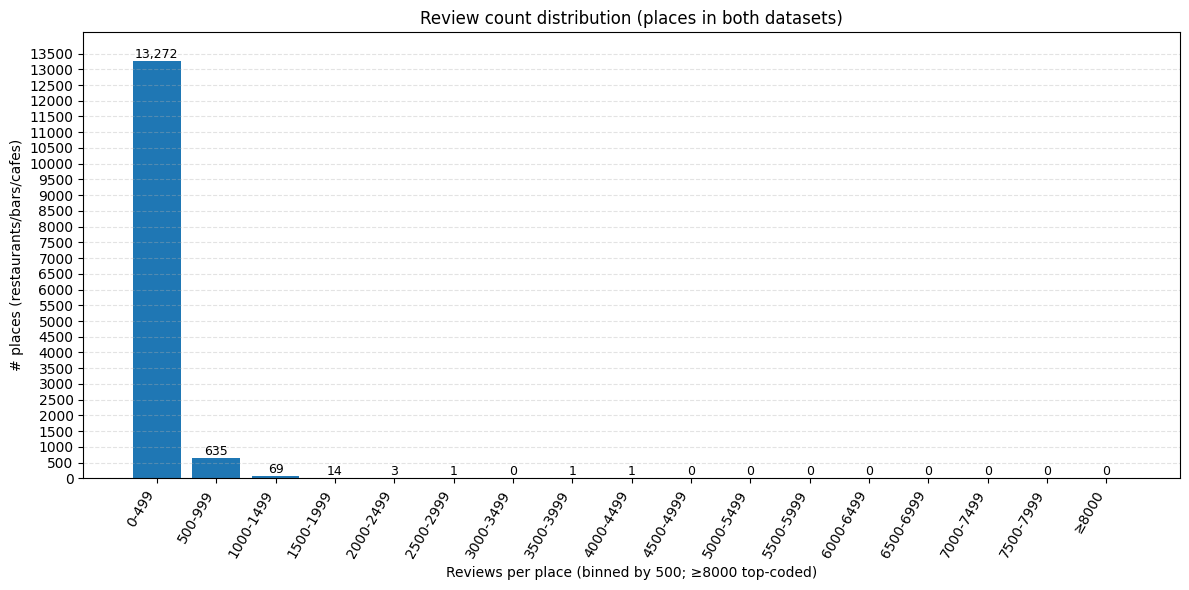

In [33]:
import matplotlib.pyplot as plt
import math
import numpy as np

BIN = 500
MAXCAP = 8000   # top-code: anything >=8000 goes into the last bin

dist_df = duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_place AS (
  SELECT r.gmap_id, COUNT(*) AS review_rows
  FROM reviews AS r
  JOIN rest_meta USING (gmap_id)
  GROUP BY r.gmap_id
),
counts AS (
  SELECT
    CASE
      WHEN review_rows >= {MAXCAP} THEN {MAXCAP}
      ELSE CAST(FLOOR(review_rows/{BIN}.0) * {BIN} AS INTEGER)
    END AS bin_lo,
    COUNT(*) AS n
  FROM per_place
  GROUP BY 1
),
bins AS (
  -- 0, 500, ..., 7500 plus a top-coded 8000 bin
  SELECT i*{BIN} AS bin_lo FROM range({MAXCAP//BIN}) t(i)
  UNION ALL
  SELECT {MAXCAP}
)
SELECT b.bin_lo, COALESCE(c.n, 0) AS n
FROM bins b
LEFT JOIN counts c USING (bin_lo)
ORDER BY b.bin_lo;
""").df()

labels = [("≥8000" if lo == MAXCAP else f"{lo}-{lo+BIN-1}") for lo in dist_df["bin_lo"]]

plt.figure(figsize=(12,6))
bars = plt.bar(labels, dist_df["n"])

ylim = int(math.ceil(dist_df["n"].max()/500.0))*500
plt.ylim(0, max(500, ylim) + 0.05*ylim)
plt.yticks(np.arange(0, ylim+1, 500))

# put the counts on top of each bar
for rect in bars:
    h = rect.get_height()
    x = rect.get_x() + rect.get_width()/2
    plt.text(x, h, f"{int(h):,}", ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=60, ha='right')
plt.xlabel('Reviews per place (binned by 500; ≥8000 top-coded)')
plt.ylabel('# places (restaurants/bars/cafes)')
plt.title('Review count distribution (places in both datasets)')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


The Vast Majority: The overwhelming concentration is in the very first bin, 0−499 reviews. This bin contains 18438 restaurants. The count drops off sharply with the next bin: 500−999 reviews contains only 690 restaurants.The number of restaurants quickly falls to the hundreds, then tens, and eventually singles, as the review count increases. If we perform a simple random sample on all restaurants, we'd likely select a very small sample of the high-volume restaurants (the "top" entities) or miss them entirely.



User degree = how many places that user reviewed (count of distinct gmap_id for that user_id)

In [35]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_user AS (
  SELECT r.user_id,
         COUNT(DISTINCT r.gmap_id) AS places_reviewed,  -- user degree
         COUNT(*)                  AS review_rows
  FROM reviews AS r
  JOIN rest_places USING (gmap_id)
  GROUP BY r.user_id
),
rk AS (
  SELECT *,
         ROW_NUMBER() OVER (ORDER BY places_reviewed DESC, user_id) AS r_top,
         ROW_NUMBER() OVER (ORDER BY places_reviewed ASC,  user_id) AS r_bot
  FROM per_user
)
SELECT 'top' AS which, user_id, places_reviewed, review_rows, r_top  AS rank
FROM rk WHERE r_top <= 5
UNION ALL
SELECT 'bottom', user_id, places_reviewed, review_rows, r_bot AS rank
FROM rk WHERE r_bot <= 5
ORDER BY which, rank;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,which,user_id,places_reviewed,review_rows,rank
0,bottom,100000015025020308336,1,2,1
1,bottom,100001986338844439684,1,1,2
2,bottom,100002441959395404499,1,1,3
3,bottom,100003253683549357418,1,1,4
4,bottom,100003843680123145108,1,1,5
5,top,108407421770671293628,287,295,1
6,top,101809599528434108038,279,285,2
7,top,103564640905126041237,253,259,3
8,top,118112434951271631467,252,260,4
9,top,104985894090564824102,247,250,5


In [36]:
dist_users_df = duckdb.sql(f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_user AS (
  SELECT
    r.user_id,
    COUNT(*)                  AS review_rows,       -- total review rows by this user on selected places
    COUNT(DISTINCT r.gmap_id) AS places_reviewed    -- user degree (distinct places)
  FROM reviews AS r
  JOIN rest_meta USING (gmap_id)
  GROUP BY r.user_id
)
SELECT
  COUNT(*)                                             AS users_intersection,
  SUM(CASE WHEN review_rows > 50 THEN 1 ELSE 0 END)   AS users_reviews_gt_50,
  SUM(CASE WHEN review_rows < 5  THEN 1 ELSE 0 END)   AS users_reviews_lt_5
FROM per_user;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [35]:
dist_users_df  # last line in the cell


,users_intersection,users_reviews_gt_50,users_reviews_lt_5
0,288269,4144.0,114134.0


Total Reviews per User: How many reviews each user has written on restaurants.

Distinct Places per User: How many unique restaurants each user has reviewed.

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

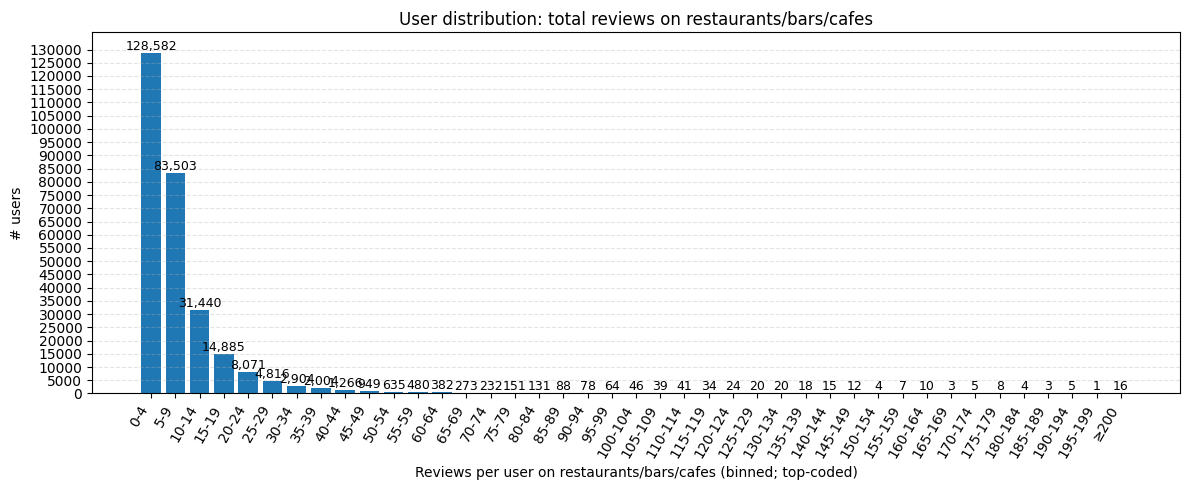

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

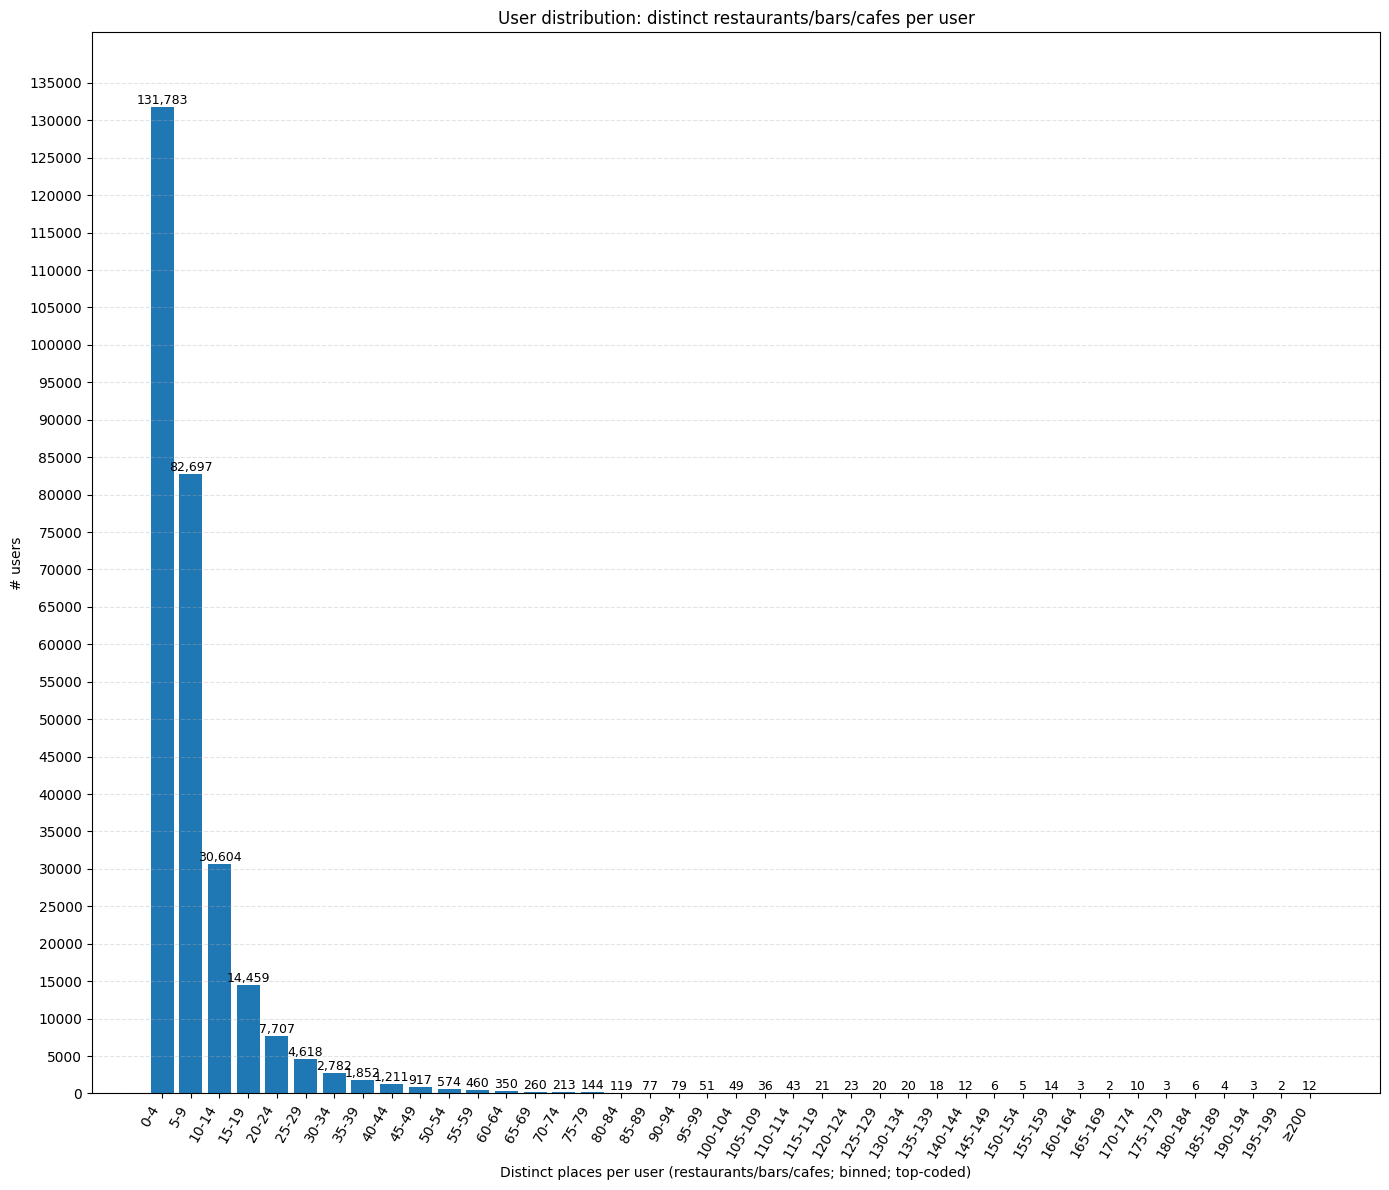

In [37]:
import duckdb, math, numpy as np, matplotlib.pyplot as plt

# knobs
BIN_U_REV  = 5      # bin width for total reviews per user
MAX_U_REV  = 200    # top-code threshold for total reviews per user
BIN_U_PL   = 5      # bin width for distinct places per user
MAX_U_PL   = 200    # top-code threshold for distinct places per user
YSTEP      = 5000   # y-axis tick step

# base CTEs used in both distributions (now: restaurant/bar/cafe + NOT NULL review fields)
base_cte = f"""
WITH rest_meta AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_user AS (
  SELECT
    r.user_id,
    COUNT(*)                   AS review_rows,       -- total review rows by this user on selected places
    COUNT(DISTINCT r.gmap_id)  AS places_reviewed    -- user degree (distinct places)
  FROM reviews AS r
  JOIN rest_meta USING (gmap_id)
  GROUP BY r.user_id
)
"""

# reviews-per-user distribution
dist_user_reviews = duckdb.sql(base_cte + f"""
, counts AS (
  SELECT
    CASE
      WHEN review_rows >= {MAX_U_REV} THEN {MAX_U_REV}
      ELSE CAST(FLOOR(review_rows/{MAX_U_REV if BIN_U_REV==0 else BIN_U_REV}.0) * {BIN_U_REV} AS INTEGER)
    END AS bin_lo,
    COUNT(*) AS n
  FROM per_user
  GROUP BY 1
),
bins AS (
  SELECT i*{BIN_U_REV} AS bin_lo FROM range({MAX_U_REV//BIN_U_REV}) t(i)
  UNION ALL SELECT {MAX_U_REV}
)
SELECT b.bin_lo, COALESCE(c.n,0) AS n
FROM bins b LEFT JOIN counts c USING (bin_lo)
ORDER BY b.bin_lo;
""").df()

labels_reviews = [("≥"+str(MAX_U_REV) if lo == MAX_U_REV else f"{lo}-{lo+BIN_U_REV-1}")
                  for lo in dist_user_reviews["bin_lo"]]

plt.figure(figsize=(12,5))
bars = plt.bar(labels_reviews, dist_user_reviews["n"])
ylim = int(math.ceil(dist_user_reviews["n"].max()/YSTEP))*YSTEP
upper = max(YSTEP, ylim)
plt.ylim(0, upper + 0.05*upper)
plt.yticks(np.arange(0, upper+1, YSTEP))
for rect in bars:
    h = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, h, f"{int(h):,}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Reviews per user on restaurants/bars/cafes (binned; top-coded)')
plt.ylabel('# users')
plt.title('User distribution: total reviews on restaurants/bars/cafes')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()

# distinct-places-per-user distribution
dist_user_places = duckdb.sql(base_cte + f"""
, counts AS (
  SELECT
    CASE
      WHEN places_reviewed >= {MAX_U_PL} THEN {MAX_U_PL}
      ELSE CAST(FLOOR(places_reviewed/{BIN_U_PL}.0) * {BIN_U_PL} AS INTEGER)
    END AS bin_lo,
    COUNT(*) AS n
  FROM per_user
  GROUP BY 1
),
bins AS (
  SELECT i*{BIN_U_PL} AS bin_lo FROM range({MAX_U_PL//BIN_U_PL}) t(i)
  UNION ALL SELECT {MAX_U_PL}
)
SELECT b.bin_lo, COALESCE(c.n,0) AS n
FROM bins b LEFT JOIN counts c USING (bin_lo)
ORDER BY b.bin_lo;
""").df()

labels_places = [("≥"+str(MAX_U_PL) if lo == MAX_U_PL else f"{lo}-{lo+BIN_U_PL-1}")
                 for lo in dist_user_places["bin_lo"]]

plt.figure(figsize=(14,12))
bars = plt.bar(labels_places, dist_user_places["n"])
ylim = int(math.ceil(dist_user_places["n"].max()/YSTEP))*YSTEP
upper = max(YSTEP, ylim)
plt.ylim(0, upper + 0.05*upper)
plt.yticks(np.arange(0, upper+1, YSTEP))
for rect in bars:
    h = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, h, f"{int(h):,}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Distinct places per user (restaurants/bars/cafes; binned; top-coded)')
plt.ylabel('# users')
plt.title('User distribution: distinct restaurants/bars/cafes per user')
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.tight_layout()
plt.show()


In [38]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
    AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )
),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_place AS (
  SELECT r.gmap_id,
         COUNT(*)                  AS review_rows,
         COUNT(DISTINCT r.user_id) AS unique_users
  FROM reviews AS r
  JOIN rest_places USING (gmap_id)
  GROUP BY r.gmap_id
)
SELECT
  COUNT(*)                               AS n_places,
  AVG(review_rows)                       AS mean_reviews_per_place,
  MEDIAN(review_rows)                    AS median_reviews_per_place,
  AVG(unique_users)                      AS mean_users_per_place,
  MEDIAN(unique_users)                   AS median_users_per_place
  -- If MEDIAN isn't available in your DuckDB version, use:
  -- QUANTILE_CONT(review_rows, 0.5) AS median_reviews_per_place,
  -- QUANTILE_CONT(unique_users, 0.5) AS median_users_per_place
FROM per_place;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,n_places,mean_reviews_per_place,median_reviews_per_place,mean_users_per_place,median_users_per_place
0,13996,160.650686,99.0,156.464418,98.0


In [39]:
duckdb.sql(f"""
WITH rest_places AS (
  SELECT DISTINCT m.gmap_id
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL

  AND (
      -- include rule (restaurant / bar / cafe, including café)
      (
        cat LIKE '%restaurant%' OR
        cat LIKE '% bar%' OR cat LIKE 'bar %' OR cat = 'bar' OR
        cat LIKE '%cafe%' OR cat LIKE '%café%' OR cat = 'cafe' OR cat = 'café'
      )
      -- exclude specific false positives
      AND NOT (
        cat LIKE '%barber shop%' OR
        cat LIKE '%internet cafe%' OR
        cat LIKE '%hookah bar%' OR
        cat LIKE '%tapas bar%' OR
        cat LIKE '%bar stool supplier%' OR
        cat LIKE '%dart bar%' OR
        cat LIKE '%barber school%' OR
        cat LIKE '%piano bar%' OR
        cat LIKE '%dog cafe%' OR
        cat LIKE '%children% cafe%' OR  -- covers "children's"/"childrens"
        cat = 'barn' OR
        cat LIKE '%cabaret club%' OR
        cat LIKE '%carbaret club%' OR   -- common misspelling
        cat LIKE '%bartending school%' OR
        cat LIKE '%bariatric surgeon%' OR
        cat LIKE '%bariartic surgeon%' OR  -- misspelling
        cat LIKE '%barrel supplier%'
      )
    )

),
reviews AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND name    IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
),
per_place AS (
  SELECT r.gmap_id,
         COUNT(*)                  AS review_rows,
         COUNT(DISTINCT r.user_id) AS unique_users
  FROM reviews AS r
  JOIN rest_places USING (gmap_id)
  GROUP BY r.gmap_id
)
SELECT
  COUNT(*)                               AS n_places,

  -- Reviews per place
  AVG(review_rows)                       AS mean_reviews_per_place,
  MEDIAN(review_rows)                    AS median_reviews_per_place,
  MIN(review_rows)                       AS min_reviews_per_place,
  MAX(review_rows)                       AS max_reviews_per_place,
  STDDEV_POP(review_rows)                AS stddev_reviews_per_place,

  -- Unique users per place
  AVG(unique_users)                      AS mean_users_per_place,
  MEDIAN(unique_users)                   AS median_users_per_place,
  MIN(unique_users)                      AS min_users_per_place,
  MAX(unique_users)                      AS max_users_per_place,
  STDDEV_POP(unique_users)               AS stddev_users_per_place

  -- If MEDIAN not available in your DuckDB version, use:
  -- QUANTILE_CONT(review_rows, 0.5) AS median_reviews_per_place,
  -- QUANTILE_CONT(unique_users, 0.5) AS median_users_per_place
FROM per_place;
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,n_places,mean_reviews_per_place,median_reviews_per_place,min_reviews_per_place,max_reviews_per_place,stddev_reviews_per_place,mean_users_per_place,median_users_per_place,min_users_per_place,max_users_per_place,stddev_users_per_place
0,13996,160.650686,99.0,2,4377,190.505225,156.464418,98.0,2,4377,183.454423


Rating distribution for businesses:

 Comparing the distribution of the pre-calculated average ratings stored in the metadata file with the distribution of average ratings calculated directly from the individual review data. Both are grouped into 0.5-star bins.

 It checks for consistency between the pre-calculated average rating provided in the metadata file (meta_avg) and the average rating calculated directly from the individual review data (from_reviews).

In essence, it answers the question: "Does the average rating listed in the business metadata match the average rating we compute from the raw reviews?"

In [40]:
# rating distributions (places present in BOTH datasets under your include/exclude rules)
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

df = duckdb.sql(f"""
WITH cats AS (
  SELECT m.gmap_id, LOWER(TRIM(cat)) AS cat_norm, CAST(m.avg_rating AS DOUBLE) AS avg_rating
  FROM read_json_auto('{meta_path}', records=true, sample_size=-1) AS m
  CROSS JOIN UNNEST(COALESCE(m.category, [])) AS u(cat)
  WHERE m.gmap_id IS NOT NULL
),
-- include restaurant / bar / cafe (incl. café), exclude false positives
rest_places AS (
  SELECT DISTINCT gmap_id
  FROM cats
  WHERE
    (
      cat_norm LIKE '%restaurant%'
      OR cat_norm LIKE '%cafe%' OR cat_norm LIKE '%café%'
      OR cat_norm = 'bar' OR cat_norm LIKE 'bar %' OR cat_norm LIKE '% bar'
    )
    AND NOT (
      cat_norm LIKE '%barber shop%' OR
      cat_norm LIKE '%barbershop%'  OR
      cat_norm LIKE '%internet cafe%' OR
      cat_norm LIKE '%hookah bar%' OR
      cat_norm LIKE '%tapas bar%' OR
      cat_norm LIKE '%bar stool supplier%' OR
      cat_norm LIKE '%dart bar%' OR
      cat_norm LIKE '%barber school%' OR
      cat_norm LIKE '%piano bar%' OR
      cat_norm LIKE '%dog cafe%' OR
      cat_norm LIKE '%children% cafe%' OR
      cat_norm = 'barn' OR
      cat_norm LIKE '%cabaret club%' OR
      cat_norm LIKE '%carbaret club%' OR
      cat_norm LIKE '%bartending school%' OR
      cat_norm LIKE '%bariatric surgeon%' OR
      cat_norm LIKE '%bariartic surgeon%' OR
      cat_norm LIKE '%barrel supplier%'
    )
),
rev_filtered AS (
  SELECT *
  FROM read_json_auto('{json_path}', records=true, sample_size=-1)
  WHERE gmap_id IS NOT NULL
    AND user_id IS NOT NULL
    AND rating  IS NOT NULL
    AND text    IS NOT NULL
    -- drop name filter if it's too sparse; keep if you want stricter rows
),
ids AS (
  -- intersect: only places in both metadata (with include/exclude) and reviews
  SELECT rp.gmap_id
  FROM rest_places rp
  JOIN (SELECT DISTINCT gmap_id FROM rev_filtered) r USING (gmap_id)
),
-- distribution from META avg_rating
meta_dist AS (
  SELECT 'meta_avg' AS source,
         ROUND(c.avg_rating*2,0)/2 AS rating_bin,
         COUNT(*) AS n
  FROM ids
  JOIN cats c USING (gmap_id)
  WHERE c.avg_rating IS NOT NULL
  GROUP BY 1,2
),
-- distribution from REVIEWS (per-place mean over filtered reviews)
place_means AS (
  SELECT r.gmap_id, AVG(CAST(r.rating AS DOUBLE)) AS mean_rating
  FROM rev_filtered r
  JOIN ids USING (gmap_id)
  GROUP BY r.gmap_id
),
rev_dist AS (
  SELECT 'from_reviews' AS source,
         ROUND(mean_rating*2,0)/2 AS rating_bin,
         COUNT(*) AS n
  FROM place_means
  GROUP BY 1,2
)
SELECT * FROM meta_dist
UNION ALL
SELECT * FROM rev_dist
ORDER BY source, rating_bin;
""").df()

df


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,source,rating_bin,n
0,from_reviews,1.0,3
1,from_reviews,1.5,7
2,from_reviews,2.0,16
3,from_reviews,2.5,72
4,from_reviews,3.0,375
5,from_reviews,3.5,1662
6,from_reviews,4.0,5350
7,from_reviews,4.5,9255
8,from_reviews,5.0,1311
9,meta_avg,1.5,18


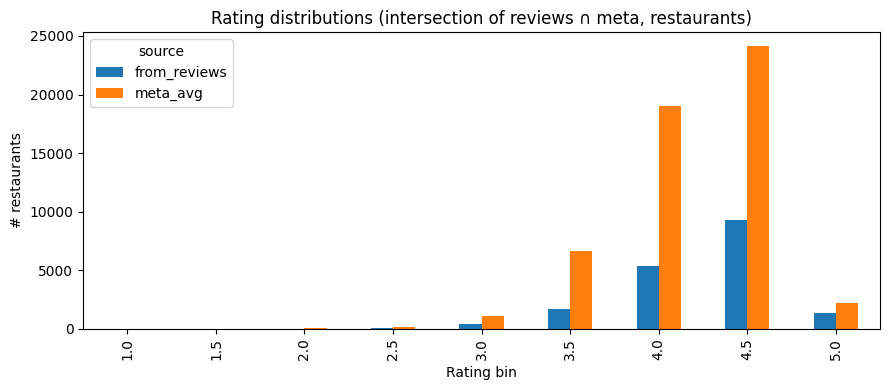

In [41]:
p = df.pivot(index='rating_bin', columns='source', values='n').fillna(0).sort_index()
ax = p.plot(kind='bar', figsize=(9,4))
ax.set_xlabel('Rating bin'); ax.set_ylabel('# restaurants')
ax.set_title('Rating distributions (intersection of reviews ∩ meta, restaurants)')
plt.tight_layout(); plt.show()
